In [1]:
cd drive/MyDrive/Network/

/content/drive/MyDrive/Network


In [2]:
import networkx as nx
import random
import csv
from csv import writer
from csv import reader
from geopy.distance import great_circle
from numpy.lib.utils import source
import requests
import json
import numpy as np, numpy.random
from matplotlib import pylab
import matplotlib.pyplot as plt
import pandas as pd
import time



In [3]:
def Randomizer(infile='coord.csv', outfile='coord-o.csv'):
    rows = []
    with open(infile, 'r') as read_obj, \
            open(outfile, 'w', newline='') as write_obj:
        csv_reader = reader(read_obj)
        fields = next(csv_reader)
        csv_writer = writer(write_obj)
        fields_upd = fields+['demand']
        csv_writer.writerow(fields_upd)
        for row in csv_reader:
            row.append(random.randint(0, 100))
            csv_writer.writerow(row)
            rows.append(row)
    return rows


def GetThDistance(coor1, coor2):
    return great_circle(coor1, coor2).km
def GetAPIDistance(row1,row2):
    lon_1, lat_1, lon_2, lat_2 = row1[3], row1[2], row2[3], row2[2]
    r = requests.get(
        f"http://router.project-osrm.org/route/v1/car/{lon_1},{lat_1};{lon_2},{lat_2}?overview=false""")
    routes = json.loads(r.content)

    # print(routes)
    if(routes['code'] != 'Ok'):
        return

    return routes.get("routes")[0]['distance']/1000

def GetRows(filename):
    fields = []
    rows = []
    with open(filename, 'r') as csvfile:
        csvreader = csv.reader(csvfile)
        fields = next(csvreader)
        for row in csvreader:
            row.append
            rows.append(row)
    return rows


def WriteDistances(infile='coord.csv', outfile='distbetn.csv'):
    with open(infile, 'r') as read_obj, \
            open(outfile, 'w', newline='') as write_obj:
        csv_reader = reader(read_obj)
        fields = next(csv_reader)
        csv_writer = writer(write_obj)
        fields_upd = fields+['dist']
        csv_writer.writerow(fields_upd)
        for row in csv_reader:
            row.append(random.randint(0, 100))
            csv_writer.writerow(row)
            rows.append(row)
    return rows


# Randomizer()
def randomPathGenerator():
    hospitals = GetRows("coord.csv")
    with open('outfile.csv', 'w', newline='') as write_obj:
        for row1 in hospitals:
            for row2 in hospitals:
                if(row1 != row2 and row1[0] == 'Maharashtra' and row2[0] == 'Maharashtra'):
                    lon_1, lat_1, lon_2, lat_2 = row1[3], row1[2], row2[3], row2[2]
                    r = requests.get(
                        f"http://router.project-osrm.org/route/v1/car/{lon_1},{lat_1};{lon_2},{lat_2}?overview=false""")
                    routes = json.loads(r.content)

                    # print(routes)
                    if(routes['code'] != 'Ok'):
                        continue

                    distance = routes.get("routes")[0]['distance']
                    csv_writer = writer(write_obj)
                    row_upd = [row1[0]]+[row1[1]]+[row2[0]]+[row2[1]]+[distance]
                    print(row_upd)
                    csv_writer.writerow(row_upd)
                    if(row2[1] == 'Latur' and row1[1] == 'North Goa'):
                        # print(route_1)
                        print(GetDistance((row1[2], row1[3]), (row2[2], row2[3])))

def GetDistricts(state):
    districts=[]
    with open("coord-all.csv", 'r') as read_obj, \
            open("coord-"+state+".csv", 'w', newline='') as write_obj:
        csv_reader = reader(read_obj)
        fields = next(csv_reader)
        csv_writer = writer(write_obj)
        csv_writer.writerow(fields)
        for row in csv_reader:
            if(row[0] == state):
                csv_writer.writerow(row)
                districts+=[row]
                print(row)
    return districts

def getEdges(sources,sinks):
    edges=[]
    for source in sources:
        for sink in sinks:
            # if sink!=source:
            edges.append(source+sink+[GetAPIDistance(source,sink)])
    return edges
def distributeSourceSink(districts,NumberOfSources):
    sourceDistr=[]
    sinkDistr=[]
    for i in range(NumberOfSources):
        sourceDistr+=[districts[i]]
    for i in range(NumberOfSources,len(districts)):
        sinkDistr+=[districts[i]]
    return sourceDistr, sinkDistr
def randomList(size, sum):
    arr = [0] * size;
    for i in range(sum) :
        arr[random.randint(0, sum) % size] += 1;
    return arr
def GetSources(sourceDistr,TotalCapacity):
    sources=[]
    # sourcesCapacity = [random.randint(0,100) for i in range(len(sourceDistr))]
    # sourcesCapacity = [ TotalCapacity*i/sum(sourcesCapacity) for i in sourcesCapacity ]
    sourcesCapacity = randomList(len(sourceDistr),TotalCapacity)
    for i in range(len(sourceDistr)):
        sources+=[sourceDistr
                  [i]+[sourcesCapacity[i]]]
    return sources
def GetSinks(sinkDistr,TotalRequirement):
    # sinkRequirement = [random.randint(0,100) for i in range(len(sinkDistr))]
    # sinkRequirement = [ TotalCapacity*i/sum(sinkRequirement) for i in sinkRequirement ]
    sinkRequirement = randomList(len(sinkDistr),TotalRequirement)
    for i in range(len(sinkDistr)):
        sinkDistr[i]+=[sinkRequirement[i]]
    return sinkDistr

def save_graph(graph,file_name):
    #initialze Figure
    plt.figure(num=None, figsize=(20, 20), dpi=80)
    plt.axis('off')
    fig = plt.figure(1)
    pos = nx.spring_layout(graph)
    nx.draw_networkx_nodes(graph,pos)
    nx.draw_networkx_edges(graph,pos)
    nx.draw_networkx_labels(graph,pos)

    cut = 1.00
    xmax = cut * max(xx for xx, yy in pos.values())
    ymax = cut * max(yy for xx, yy in pos.values())
    plt.xlim(0, xmax)
    plt.ylim(0, ymax)
    plt.show()

    plt.savefig(file_name,bbox_inches="tight")
    pylab.close()
    del fig

In [ ]:
# get districts of the state
statesCapacity={"Maharashtra":991,"Karnataka":275,"Kerala":298,"Tamil Nadu":249,"Orissa":340,"Chhattisgarh":85,"Jharkhand":434,"Gujrat":488}
statesDemand = {"Maharashtra":991,"Karnataka":275,"Kerala":298,"Tamil Nadu":249,"Orissa":340,"Chhattisgarh":85,"Jharkhand":434,"Gujrat":488}
statesDistricts={}
statesSources={}
statesSinks={}

totalDistricts=[]
totalSources=[]
totalSinks=[]
for state in statesCapacity:
  statesDistricts[state]=GetDistricts(state)
  totalDistricts+=statesDistricts[state]
print(totalDistricts)
sfsf
state="Maharashtra"
districts=GetDistricts(state)
print(len(districts))

In [5]:
for state in statesCapacity:
  sourceDistr,sinkDistr = distributeSourceSink(statesDistricts[state],5)
  statesSources[state]=GetSources(sourceDistr,statesCapacity[state])
  statesSinks[state]=GetSinks(sinkDistr,statesDemand[state])
  totalSinks+=statesSinks[state]
  totalSources+=statesSources[state]
  
# print(sourceDistr)
# print(sinkDistr)
# # Get sources and random capacities with 275 sum
# sources=GetSources(sourceDistr,275)
# print(sources)

[['Maharashtra', 'Ahmednagar', '19.21759903201788', '74.69220260610572'], ['Maharashtra', 'Akola', '20.746310479041906', '77.12122320359276'], ['Maharashtra', 'Amravati', '21.165209918107358', '77.67583503184723'], ['Maharashtra', 'Aurangabad', '20.097922883295197', '75.32072196796334'], ['Maharashtra', 'Bhandara', '21.211792649727748', '80.10950199637024']]
[['Maharashtra', 'Bid', '18.952353340080986', '75.69319706477731'], ['Maharashtra', 'Buldana', '20.56680611183355', '76.39017880364096'], ['Maharashtra', 'Chandrapur', '20.095609090909075', '79.31556380471388'], ['Maharashtra', 'Dhule', '21.274018690400514', '74.58719071837263'], ['Maharashtra', 'Garhchiroli', '19.795546096654277', '80.30965563816602'], ['Maharashtra', 'Gondiya', '21.225008411214993', '80.17522698598128'], ['Maharashtra', 'Greater Bombay', '19.085069788026964', '72.84261961332419'], ['Maharashtra', 'Hingoli', '19.59525302245251', '77.09239412780653'], ['Maharashtra', 'Jalgaon', '20.8828943415638', '75.5514042181069

In [6]:

# # Give random requirement to all cities summing to 275
# sinks=GetSinks(sinkDistr,275)
# print(sinks)

[['Maharashtra', 'Bid', '18.952353340080986', '75.69319706477731', 6], ['Maharashtra', 'Buldana', '20.56680611183355', '76.39017880364096', 15], ['Maharashtra', 'Chandrapur', '20.095609090909075', '79.31556380471388', 7], ['Maharashtra', 'Dhule', '21.274018690400514', '74.58719071837263', 9], ['Maharashtra', 'Garhchiroli', '19.795546096654277', '80.30965563816602', 10], ['Maharashtra', 'Gondiya', '21.225008411214993', '80.17522698598128', 6], ['Maharashtra', 'Greater Bombay', '19.085069788026964', '72.84261961332419', 13], ['Maharashtra', 'Hingoli', '19.59525302245251', '77.09239412780653', 15], ['Maharashtra', 'Jalgaon', '20.8828943415638', '75.55140421810695', 16], ['Maharashtra', 'Jalna', '19.984612534818933', '75.98473607242339', 8], ['Maharashtra', 'Kolhapur', '16.44881301587301', '74.12897150793648', 7], ['Maharashtra', 'Latur', '18.348687268993856', '76.75812607802874', 8], ['Maharashtra', 'Nagpur', '21.196556862745105', '79.02166176470584', 9], ['Maharashtra', 'Nanded', '19.209

In [7]:
# get distance between all sources and sinks
edges=getEdges(sources,sinks)
print("EDGES:")
print(edges)



EDGES:
[['Maharashtra', 'Ahmednagar', '19.21759903201788', '74.69220260610572', 52, 'Maharashtra', 'Bid', '18.952353340080986', '75.69319706477731', 6, 145.3231], ['Maharashtra', 'Ahmednagar', '19.21759903201788', '74.69220260610572', 52, 'Maharashtra', 'Buldana', '20.56680611183355', '76.39017880364096', 15, 286.4115], ['Maharashtra', 'Ahmednagar', '19.21759903201788', '74.69220260610572', 52, 'Maharashtra', 'Chandrapur', '20.095609090909075', '79.31556380471388', 7, 662.679], ['Maharashtra', 'Ahmednagar', '19.21759903201788', '74.69220260610572', 52, 'Maharashtra', 'Dhule', '21.274018690400514', '74.58719071837263', 9, 254.1889], ['Maharashtra', 'Ahmednagar', '19.21759903201788', '74.69220260610572', 52, 'Maharashtra', 'Garhchiroli', '19.795546096654277', '80.30965563816602', 10, 786.0002], ['Maharashtra', 'Ahmednagar', '19.21759903201788', '74.69220260610572', 52, 'Maharashtra', 'Gondiya', '21.225008411214993', '80.17522698598128', 6, 718.2376999999999], ['Maharashtra', 'Ahmednagar'

In [8]:

pd.DataFrame(sources).to_csv(state+"_sources.csv",index=False)
pd.DataFrame(sinks).to_csv(state+"_sinks.csv",index=False)
pd.DataFrame(edges).to_csv(state+"_edges.csv",index=False)

print(sources)
print(sinks)
print(edges)


[['Maharashtra', 'Ahmednagar', '19.21759903201788', '74.69220260610572', 52], ['Maharashtra', 'Akola', '20.746310479041906', '77.12122320359276', 56], ['Maharashtra', 'Amravati', '21.165209918107358', '77.67583503184723', 49], ['Maharashtra', 'Aurangabad', '20.097922883295197', '75.32072196796334', 69], ['Maharashtra', 'Bhandara', '21.211792649727748', '80.10950199637024', 49]]
[['Maharashtra', 'Bid', '18.952353340080986', '75.69319706477731', 6], ['Maharashtra', 'Buldana', '20.56680611183355', '76.39017880364096', 15], ['Maharashtra', 'Chandrapur', '20.095609090909075', '79.31556380471388', 7], ['Maharashtra', 'Dhule', '21.274018690400514', '74.58719071837263', 9], ['Maharashtra', 'Garhchiroli', '19.795546096654277', '80.30965563816602', 10], ['Maharashtra', 'Gondiya', '21.225008411214993', '80.17522698598128', 6], ['Maharashtra', 'Greater Bombay', '19.085069788026964', '72.84261961332419', 13], ['Maharashtra', 'Hingoli', '19.59525302245251', '77.09239412780653', 15], ['Maharashtra', 

In [9]:
sources = pd.read_csv(state+"_sources.csv").values.tolist()
sinks = pd.read_csv(state+"_sinks.csv").values.tolist()
edges = pd.read_csv(state+"_edges.csv").values.tolist()
print(sources)
print(sinks)
print(edges)

[['Maharashtra', 'Ahmednagar', 19.21759903201788, 74.69220260610572, 52], ['Maharashtra', 'Akola', 20.746310479041906, 77.12122320359276, 56], ['Maharashtra', 'Amravati', 21.165209918107358, 77.67583503184724, 49], ['Maharashtra', 'Aurangabad', 20.0979228832952, 75.32072196796334, 69], ['Maharashtra', 'Bhandara', 21.211792649727744, 80.10950199637023, 49]]
[['Maharashtra', 'Bid', 18.952353340080982, 75.69319706477732, 6], ['Maharashtra', 'Buldana', 20.56680611183355, 76.39017880364095, 15], ['Maharashtra', 'Chandrapur', 20.095609090909072, 79.31556380471388, 7], ['Maharashtra', 'Dhule', 21.274018690400514, 74.58719071837263, 9], ['Maharashtra', 'Garhchiroli', 19.79554609665428, 80.30965563816602, 10], ['Maharashtra', 'Gondiya', 21.225008411214997, 80.17522698598128, 6], ['Maharashtra', 'Greater Bombay', 19.085069788026964, 72.84261961332419, 13], ['Maharashtra', 'Hingoli', 19.59525302245251, 77.09239412780653, 15], ['Maharashtra', 'Jalgaon', 20.8828943415638, 75.55140421810695, 16], ['

In [10]:
# G = nx.DiGraph()
# G.add_node("Super-source",type='source')
# G.add_node("Super-sink",type='sink')
# for source in sources:
#   G.add_node(source[1],type='source')
#   G.add_edge("Super-source",source[1],weight=int(source[1][4]))
# for sink in sinks:
#   G.add_node(sink[1],type='sink')
#   G.add_edge(sink[1],"Super-sink",weight=int(sink[1][4]))

# for edge in edges:
#   G.add_edge(edge[0][1], edge[1][1], weight=int(edge[2]) )

In [11]:
G = nx.DiGraph()
totalDemand=0
for source in sources:
  G.add_node(source[1],type='source',demand=-1*int(source[4]))
  totalDemand+=-1*float(source[4])
print("Source Demand: ")
print(totalDemand)
for sink in sinks:
  G.add_node(sink[1],type='sink',demand=int(sink[4]))
  totalDemand+=float(sink[4])

for edge in edges:
  if float(edge[10])!=float("nan"):
    G.add_edge(edge[1], edge[6], weight=int(edge[10]) )
# G.add_node(sink[1],type='sink',demand=totalDemand)
print(totalDemand)

Source Demand: 
-275.0
0.0


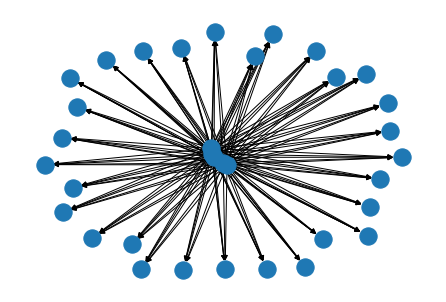

In [12]:
nx.draw(G)

In [13]:

start = time.time()

flowCost, flowDict = nx.network_simplex(G)
end = time.time()
print(end - start)
with open(state+"_flow.json", "w") as outfile:
  outfile.write(str(end-start))

0.005653858184814453


In [14]:
print(flowCost)
print(flowDict)

67081
{'Ahmednagar': {'Bid': 0, 'Buldana': 0, 'Chandrapur': 0, 'Dhule': 0, 'Garhchiroli': 0, 'Gondiya': 0, 'Greater Bombay': 0, 'Hingoli': 0, 'Jalgaon': 0, 'Jalna': 0, 'Kolhapur': 7, 'Latur': 0, 'Nagpur': 0, 'Nanded': 0, 'Nandurbar': 0, 'Nashik': 0, 'Osmanabad': 0, 'Parbhani': 0, 'Pune': 6, 'Raigarh': 11, 'Ratnagiri': 5, 'Sangli': 7, 'Satara': 9, 'Sindhudurg': 7, 'Solapur': 0, 'Thane': 0, 'Wardha': 0, 'Washim': 0, 'Yavatmal': 0}, 'Akola': {'Bid': 0, 'Buldana': 15, 'Chandrapur': 0, 'Dhule': 0, 'Garhchiroli': 0, 'Gondiya': 0, 'Greater Bombay': 0, 'Hingoli': 1, 'Jalgaon': 16, 'Jalna': 1, 'Kolhapur': 0, 'Latur': 8, 'Nagpur': 0, 'Nanded': 0, 'Nandurbar': 0, 'Nashik': 0, 'Osmanabad': 7, 'Parbhani': 8, 'Pune': 0, 'Raigarh': 0, 'Ratnagiri': 0, 'Sangli': 0, 'Satara': 0, 'Sindhudurg': 0, 'Solapur': 0, 'Thane': 0, 'Wardha': 0, 'Washim': 0, 'Yavatmal': 0}, 'Amravati': {'Bid': 0, 'Buldana': 0, 'Chandrapur': 0, 'Dhule': 0, 'Garhchiroli': 0, 'Gondiya': 0, 'Greater Bombay': 0, 'Hingoli': 14, 'Jalgaon'

In [15]:
with open(state+"_flow.json", "w") as outfile: 
  json.dump(flowDict, outfile)
with open(state+'_flowCost.txt', 'w') as f:
  f.write(str(flowCost))

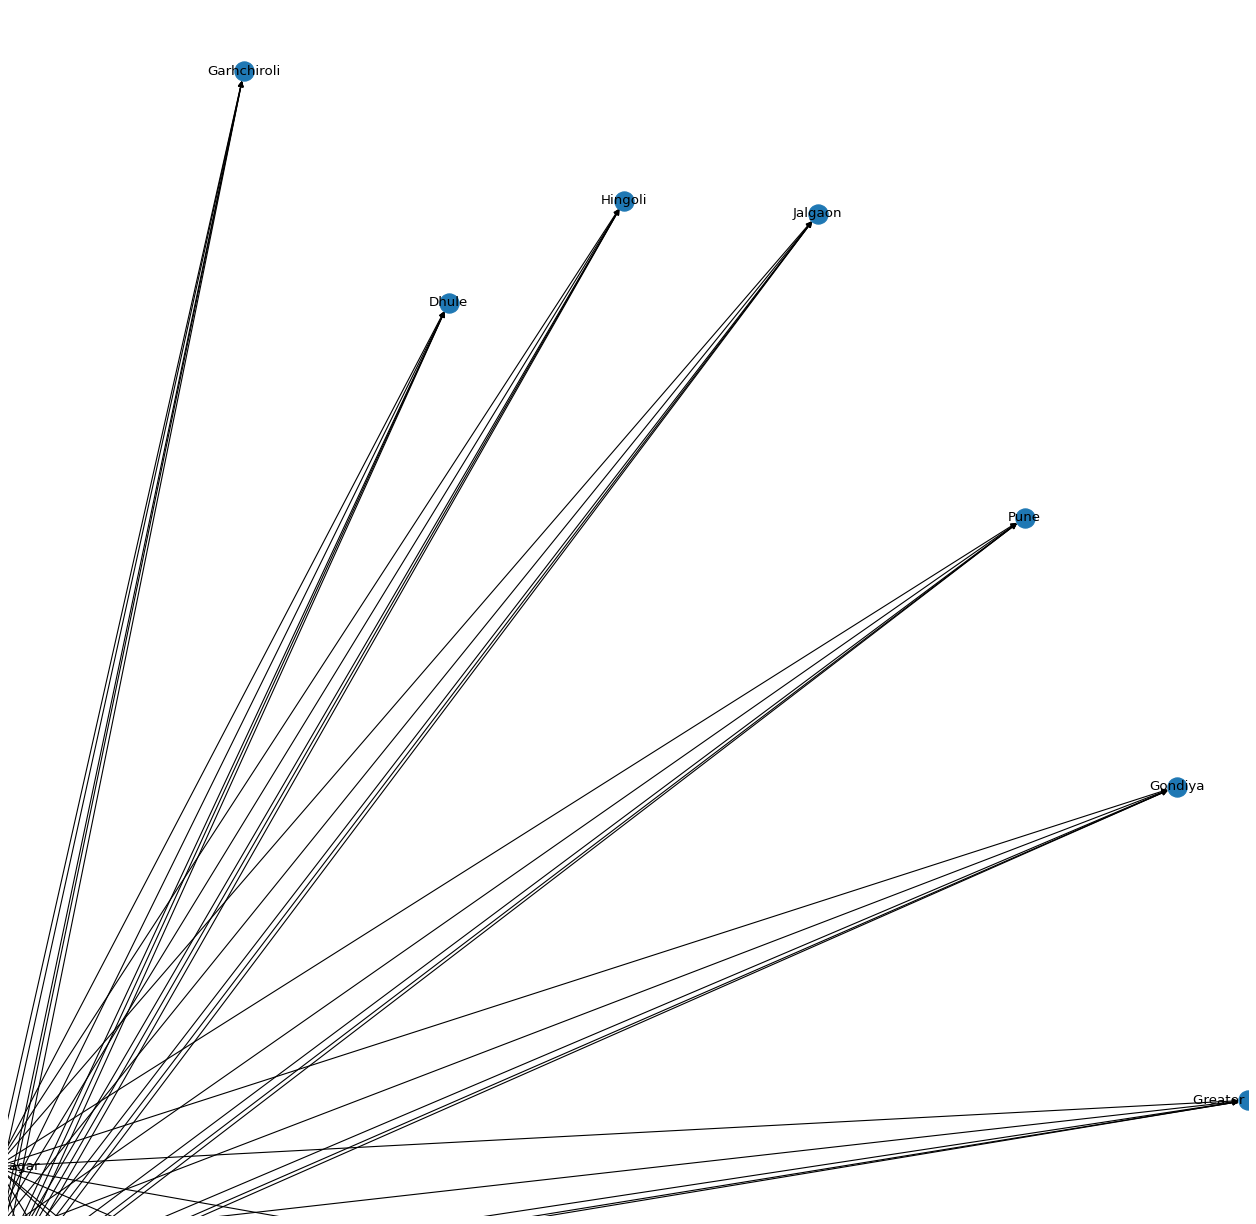

In [16]:
save_graph(G,"my_graph.pdf")


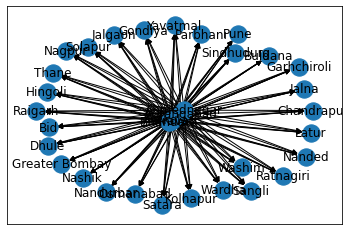

In [17]:
nx.draw_networkx(G, with_labels = True)
plt.show()

In [18]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


In [19]:
!conda install -c nvidia -c rapidsai -c numba -c conda-forge cugraph cudatoolkit=11.0


ERROR: The install method you used for conda--probably either `pip install conda`
or `easy_install conda`--is not compatible with using conda as an application.
If your intention is to install conda as a standalone application, currently
supported install methods include the Anaconda installer and the miniconda
installer.  You can download the miniconda installer from
https://conda.io/miniconda.html.



In [20]:
!pip install conda

In [21]:
!lshw -C display

In [22]:
!apt install lshw -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
lshw is already the newest version (02.18-0.1ubuntu6.18.04.2).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [23]:
!ls

coord-all.csv		Karnataka_flow.json	  my_graph.pdf
coord-Karnataka.csv	Maharashtra_edges.csv	  sinks.csv
coord-Maharashtra.csv	Maharashtra_flowCost.txt  sinks.txt
edges.csv		Maharashtra_flow.json	  sources.csv
edges.txt		Maharashtra_sinks.csv	  sources.txt
Karnataka_flowCost.txt	Maharashtra_sources.csv   state+_edges.csv
